In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing the required libraries and packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**Exploratory Data Analysis**

In [ ]:
#function to print the summary statistics of the dataset

def dataset_summary(df):
    """
    Prints the summary statistics, information, missing value counts, and shape of a dataset.

    Parameters:
    df (pandas.DataFrame): The dataset to summarize.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input must be a pandas DataFrame")

    print("Summary Statistics:")
    print(df.describe(include='all'))
    print("\nDataFrame Information:")
    print(df.info())
    print("\nShape of the DataFrame:")
    print(df.shape)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\n")

In [ ]:
#printing first five rows of first df
june_trends = pd.read_csv('/content/drive/MyDrive/archive (4)/2021_June_twitter_trending_data.csv', encoding='latin-1')
june_trends.head()

<ipython-input-3-ca28a3a58ec3>:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  june_trends = pd.read_csv('/content/drive/MyDrive/archive (4)/2021_June_twitter_trending_data.csv', encoding='latin-1')


,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1399565320025640961,2021-06-01 03:15:49,agedcare,en,59,Twitter Web App,https://mobile.twitter.com,RT @SenatorSiewert: The Government are acting ...,2015-03-19 19:29:57,"Richard Forrester: Anti Fascist, Evil #SewerRa...",3526.0,Commenting & working towards social justice & ...,Mornington Peninsula Melbourne,#estimates,2021-06-01 03:15:46.457488,Australia
1,1399565250723139586,2021-06-01 03:15:33,estimates,en,4,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Some aged care vax stats given...,2014-01-15 22:32:01,Say No To Murdochâs IPA ð¥,2017.0,âThe Future Is Determined By Those Who Show ...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
2,1399565250475675653,2021-06-01 03:15:33,NaN,en,383,Twitter for Android,http://twitter.com/download/android,"RT @CroweDM: Katy Gallagher: ""Are you responsi...",2014-04-18 06:55:37,ð³ï¸âðð§ð¥ðBuddy & Mum Proud Se...,1400.0,"A mix of politics and animals, I do this for l...",Australia,#estimates,2021-06-01 03:15:46.457488,Australia
3,1399565240350613504,2021-06-01 03:15:30,NaN,en,18,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: The vaccine rollout has been g...,2014-01-15 22:32:01,Say No To Murdochâs IPA ð¥,2017.0,âThe Future Is Determined By Those Who Show ...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
4,1399565229529329665,2021-06-01 03:15:28,NaN,en,5,Twitter for iPhone,http://twitter.com/download/iphone,"RT @TomMcIlroy: About 32,000 aged care workers...",2014-01-15 22:32:01,Say No To Murdochâs IPA ð¥,2017.0,âThe Future Is Determined By Those Who Show ...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia


In [ ]:
#getting the summary of the first dataset
dataset_summary(june_trends)

Summary Statistics:
                   tweet_id       tweet_datetime tweet_hashtags  \
count                 37190                37188          28091   
unique                32020                11458           5400   
top     1401156937216000002  2021-06-12 12:14:58      BETAwards   
freq                     11                  181            307   
mean                    NaN                  NaN            NaN   
std                     NaN                  NaN            NaN   
min                     NaN                  NaN            NaN   
25%                     NaN                  NaN            NaN   
50%                     NaN                  NaN            NaN   
75%                     NaN                  NaN            NaN   
max                     NaN                  NaN            NaN   

       tweet_language retweet_count         tweet_source  \
count           37188         37188                37187   
unique             53          1675                  26

In [ ]:
#printing the first five rows of july_trends df
july_trends = pd.read_csv('/content/drive/MyDrive/archive (4)/2021_July_twitter_trending_data.csv', encoding='latin-1')
july_trends.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1411297537265262600,2021-07-03 12:15:28,AFLFreoBlues,en,17,Twitter Web App,https://mobile.twitter.com,RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...,2012-09-06 07:30:06,WoodyAUð¦,100.0,Degree in Business (Marketing) @sixers @ManCit...,Australia,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
1,1411297536078352390,2021-07-03 12:15:27,AFLFreoBlues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,Fremantle had a stack of chances to win that g...,2009-05-08 06:29:03,Mitch Cleary,26805.0,"Journalist @AFLcomau, podcast @AFLExchange, ho...","Melbourne, Australia",#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
2,1411297531590443008,2021-07-03 12:15:26,AFLFreoBlues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,Is this our first win against a team above us ...,2009-03-04 12:58:43,Tim Field,42.0,"Supporter of @CarltonFC @McLarenF1, @GreenEDGE...","Adelaide, South Australia",#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
3,1411297529187106817,2021-07-03 12:15:26,AFLFreoBlues,en,0,Twitter Web App,https://mobile.twitter.com,Imagine though you have a rousing win like tha...,2009-07-02 06:37:57,Tim,2234.0,Alive in the age of outrage and outrageous beh...,Kulin nations,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
4,1411297526884409344,2021-07-03 12:15:25,AFLfreoblues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,"Carlton isnât very good but a win, is a win,...",2011-06-06 06:22:59,QUENTIN HULL,9909.0,ðHost/Broadcaster/Journalist/MC. Personal a...,Australia,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia


In [ ]:
#getting the summary of the second dataset
dataset_summary(july_trends)

Summary Statistics:
                   tweet_id       tweet_datetime tweet_hashtags  \
count                 32217                32217          24969   
unique                28234                10090           5830   
top     1421443301186568196  2021-07-31 12:16:14    ThankYouBTS   
freq                      7                  107            444   
mean                    NaN                  NaN            NaN   
std                     NaN                  NaN            NaN   
min                     NaN                  NaN            NaN   
25%                     NaN                  NaN            NaN   
50%                     NaN                  NaN            NaN   
75%                     NaN                  NaN            NaN   
max                     NaN                  NaN            NaN   

       tweet_language retweet_count         tweet_source  \
count           32217         32217                32216   
unique             55          1254                  30

In [ ]:
#concatenating two datasets
trends = pd.concat([july_trends, june_trends])
trends.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1411297537265262600,2021-07-03 12:15:28,AFLFreoBlues,en,17,Twitter Web App,https://mobile.twitter.com,RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...,2012-09-06 07:30:06,WoodyAUð¦,100.0,Degree in Business (Marketing) @sixers @ManCit...,Australia,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
1,1411297536078352390,2021-07-03 12:15:27,AFLFreoBlues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,Fremantle had a stack of chances to win that g...,2009-05-08 06:29:03,Mitch Cleary,26805.0,"Journalist @AFLcomau, podcast @AFLExchange, ho...","Melbourne, Australia",#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
2,1411297531590443008,2021-07-03 12:15:26,AFLFreoBlues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,Is this our first win against a team above us ...,2009-03-04 12:58:43,Tim Field,42.0,"Supporter of @CarltonFC @McLarenF1, @GreenEDGE...","Adelaide, South Australia",#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
3,1411297529187106817,2021-07-03 12:15:26,AFLFreoBlues,en,0,Twitter Web App,https://mobile.twitter.com,Imagine though you have a rousing win like tha...,2009-07-02 06:37:57,Tim,2234.0,Alive in the age of outrage and outrageous beh...,Kulin nations,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia
4,1411297526884409344,2021-07-03 12:15:25,AFLfreoblues,en,0,Twitter for iPhone,http://twitter.com/download/iphone,"Carlton isnât very good but a win, is a win,...",2011-06-06 06:22:59,QUENTIN HULL,9909.0,ðHost/Broadcaster/Journalist/MC. Personal a...,Australia,#AFLFreoBlues,2021-07-03 12:15:17.702479,Australia


In [ ]:
#printing the summary statistics of trends
dataset_summary(trends)

Summary Statistics:
                   tweet_id       tweet_datetime tweet_hashtags  \
count                 69407                69405          53060   
unique                60254                21548          11115   
top     1401156937216000002  2021-06-12 12:14:58    ThankYouBTS   
freq                     11                  181            444   
mean                    NaN                  NaN            NaN   
std                     NaN                  NaN            NaN   
min                     NaN                  NaN            NaN   
25%                     NaN                  NaN            NaN   
50%                     NaN                  NaN            NaN   
75%                     NaN                  NaN            NaN   
max                     NaN                  NaN            NaN   

       tweet_language retweet_count         tweet_source  \
count           69405         69405                69403   
unique             57          2325                  48

In [ ]:
#dropping irrelevant columns
cols_to_drop = ['tweet_id',
                'tweet_datetime',
                'tweet_source_url',
                'tweet_source',
                'user_created_datetime',
                'user_location',
                'searched_at_datetime',
                'searched_by_hashtag',
                'searched_hashtag_country'
                ]

trends_drop = trends.drop(columns=cols_to_drop)

trends_drop.head()

,tweet_hashtags,tweet_language,retweet_count,tweet_text,user_name,user_followers_count,user_description
0,AFLFreoBlues,en,17,RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...,WoodyAUð¦,100.0,Degree in Business (Marketing) @sixers @ManCit...
1,AFLFreoBlues,en,0,Fremantle had a stack of chances to win that g...,Mitch Cleary,26805.0,"Journalist @AFLcomau, podcast @AFLExchange, ho..."
2,AFLFreoBlues,en,0,Is this our first win against a team above us ...,Tim Field,42.0,"Supporter of @CarltonFC @McLarenF1, @GreenEDGE..."
3,AFLFreoBlues,en,0,Imagine though you have a rousing win like tha...,Tim,2234.0,Alive in the age of outrage and outrageous beh...
4,AFLfreoblues,en,0,"Carlton isnât very good but a win, is a win,...",QUENTIN HULL,9909.0,ðHost/Broadcaster/Journalist/MC. Personal a...


In [ ]:
#printing the unique tweets languages
trends_drop['tweet_language'].unique()

array(['en', 'pt', 'und', 'tl', 'in', 'es', 'nl', 'ur', 'ca', 'tr', 'fr',
       'ja', 'sv', 'it', 'pl', 'hi', 'ro', 'mr', 'de', 'hu', 'ht', 'no',
       'cy', 'et', 'da', 'eu', 'ta', 'bn', 'gu', 'ml', 'te', 'or', 'fi',
       'is', 'ru', 'ko', 'th', 'zh', 'ar', 'el', 'kn',
       '2021-07-10 12:15:07.075022', 'fa', 'vi', 'lv', 'lt', 'uk', 'ne',
       'ckb', 'pa', 'cs', 'sr', 'sl', 'iw', 'bg', nan, '973', 'my'],
      dtype=object)

In [ ]:
#subsetting for english tweets
trends_drop_en = trends_drop[trends_drop['tweet_language'] == 'en']

#printing the head of the trends_drop_en
trends_drop_en.head()

,tweet_hashtags,tweet_language,retweet_count,tweet_text,user_name,user_followers_count,user_description
0,AFLFreoBlues,en,17,RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...,WoodyAUð¦,100.0,Degree in Business (Marketing) @sixers @ManCit...
1,AFLFreoBlues,en,0,Fremantle had a stack of chances to win that g...,Mitch Cleary,26805.0,"Journalist @AFLcomau, podcast @AFLExchange, ho..."
2,AFLFreoBlues,en,0,Is this our first win against a team above us ...,Tim Field,42.0,"Supporter of @CarltonFC @McLarenF1, @GreenEDGE..."
3,AFLFreoBlues,en,0,Imagine though you have a rousing win like tha...,Tim,2234.0,Alive in the age of outrage and outrageous beh...
4,AFLfreoblues,en,0,"Carlton isnât very good but a win, is a win,...",QUENTIN HULL,9909.0,ðHost/Broadcaster/Journalist/MC. Personal a...


In [ ]:
#dropping missing values in retweet_count, tweet_text, user_followers_count columns
trends_drop_en = trends_drop_en.dropna(subset=['retweet_count', 'tweet_text', 'user_followers_count'])
trends_drop_en.isnull().sum()

,0
tweet_hashtags,8452
tweet_language,0
retweet_count,0
tweet_text,0
user_name,5
user_followers_count,0
user_description,4766


In [ ]:
#printing the shape of the trends_drop
trends_drop_en.shape

(32789, 7)

#**Data Visualization**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


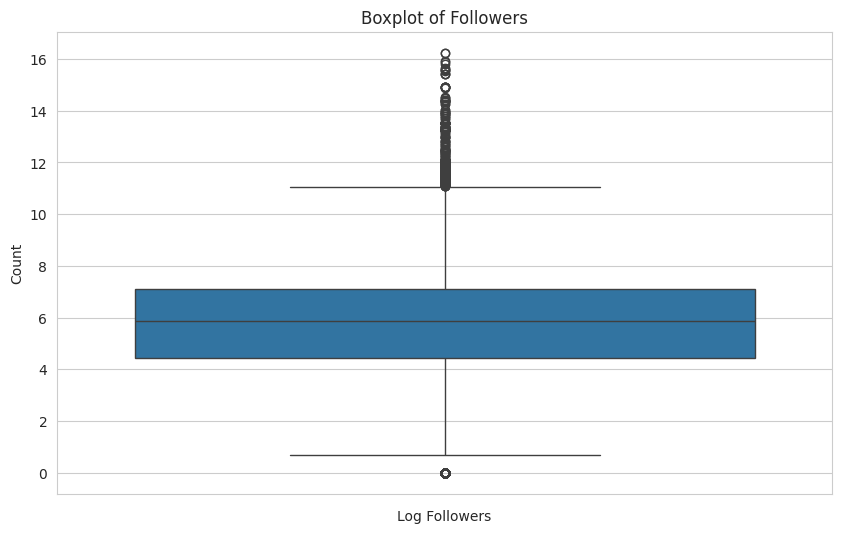

<Figure size 640x480 with 0 Axes>

In [ ]:
#checking for distribution of followers using boxplot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Reset the index to ensure unique labels before applying log transformation
trends_drop_en = trends_drop_en.reset_index(drop=True)

trends_drop_en['log_followers'] = np.log(trends_drop_en['user_followers_count'])
sns.boxplot(data=trends_drop_en, y='log_followers')
plt.title('Boxplot of Followers')
plt.xlabel('Log Followers')
plt.ylabel('Count')
plt.show()

#saving the figure
plt.savefig('followers_boxplot.png')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


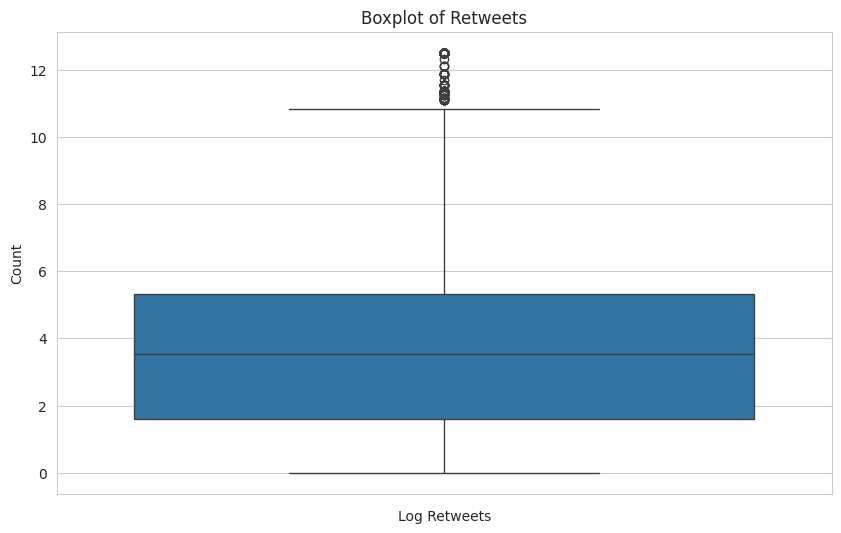

<Figure size 640x480 with 0 Axes>

In [ ]:
#replacing brazil with 0 in the retweet_count column
trends_drop_en['retweet_count'] = trends_drop_en['retweet_count'].replace('Brazil', 0)

#converting retweet count to integer
trends_drop_en['retweet_count'] = trends_drop_en['retweet_count'].astype(int)

#checking for distribution of retweets using boxplot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
trends_drop_en['log_retweets'] = np.log(trends_drop_en['retweet_count'])
sns.boxplot(data=trends_drop_en, y='log_retweets')
plt.title('Boxplot of Retweets')
plt.xlabel('Log Retweets')
plt.ylabel('Count')
plt.show()

#saving the figure
plt.savefig('retweets_boxplot.png')

#**Data Preprocessing**

- **Text Preprocessing**

In [ ]:
#function to remove unwanted characters
def remove_symbols(text):
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\*+', '', text)   # Remove asterisks
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation except words and spaces
    text = re.sub(r'\d+', '', text)   # Remove numbers (optional, if needed)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

# Apply the function to the text column
trends_drop_en['cleaned_tweet_text'] = trends_drop_en['tweet_text'].apply(remove_symbols)

print(trends_drop_en['cleaned_tweet_text'].head())

0    RT THATS ALL SHE WROTE We take home a point vi...
1    Fremantle had a stack of chances to win that g...
2     Is this our first win against a team above us in
3    Imagine though you have a rousing win like tha...
4    Carlton isnât very good but a win is a win is ...
Name: cleaned_tweet_text, dtype: object


In [ ]:
# Tokenizing the cleaned text
trends_drop_en['tokens'] = trends_drop_en['cleaned_tweet_text'].apply(word_tokenize)

# Lemmatizzing the tokens
lemmatizer = WordNetLemmatizer()
trends_drop_en['lemmatized_tokens'] = trends_drop_en['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Converting the tokens back to text
trends_drop_en['final_cleaned_text'] = trends_drop_en['lemmatized_tokens'].apply(lambda x: ' '.join(x))

#printing the head of the final_cleaned_text column
print(trends_drop_en['final_cleaned_text'].head())


0    RT THATS ALL SHE WROTE We take home a point vi...
1    Fremantle had a stack of chance to win that ga...
2      Is this our first win against a team above u in
3    Imagine though you have a rousing win like tha...
4    Carlton isnât very good but a win is a win is ...
Name: final_cleaned_text, dtype: object


In [ ]:
#verifying all the results in the new columns
print(trends_drop_en[['tweet_text', 'cleaned_tweet_text', 'final_cleaned_text']].head())

                                          tweet_text  \
0  RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...   
1  Fremantle had a stack of chances to win that g...   
2  Is this our first win against a team above us ...   
3  Imagine though you have a rousing win like tha...   
4  Carlton isnât very good but a win, is a win,...   

                                  cleaned_tweet_text  \
0  RT THATS ALL SHE WROTE We take home a point vi...   
1  Fremantle had a stack of chances to win that g...   
2   Is this our first win against a team above us in   
3  Imagine though you have a rousing win like tha...   
4  Carlton isnât very good but a win is a win is ...   

                                  final_cleaned_text  
0  RT THATS ALL SHE WROTE We take home a point vi...  
1  Fremantle had a stack of chance to win that ga...  
2    Is this our first win against a team above u in  
3  Imagine though you have a rousing win like tha...  
4  Carlton isnât very good but a win is a win is ..

# **Sentiment Analysis**

In [ ]:
# Use a pipeline as a high-level helper
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

trends_drop_en['sentiment'] = trends_drop_en['final_cleaned_text'].apply(lambda x: pipe(x)[0]['label'])
trends_drop_en['sentiment'].value_counts()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

,count
sentiment,
neutral,16795
positive,10507
negative,5487


In [ ]:
# Saving to xlsx
trends_drop_en.to_excel('trends_drop_en_with_sentiment.xlsx', index=False)

# **Feature Engineering**

In [ ]:
# reading trends_drop_en_with_sentiment
trends_df = pd.read_excel('/content/trends_drop_en_with_sentiment.xlsx')

In [ ]:
# Creating features based on my hypothesis
trends_drop_en['is_negative'] = trends_drop_en['sentiment'].apply(lambda x: 1 if x == 'NEGATIVE' else 0)
trends_drop_en['high_retweets'] = trends_drop_en['retweets'].apply(lambda x: 1 if x > 100 else 0)  # Applying the threshold of 100
trends_drop_en['low_followers'] = trends_drop_en['follower_count'].apply(lambda x: 1 if x < 100 else 0)  # Applying the threshold of 100

# Feature that combines sentiment with engagement metrics
trends_drop_en['malicious_potential'] = trends_drop_en['is_negative'] * trends_drop_en['high_retweets'] * trends_drop_en['low_followers']

#**Clustering**

In [ ]:
#saving trends_drop to xlsx file
trends_drop_en.to_excel('trends_drop_en.xlsx', index=False)

In [ ]:
#checking to see the columns
trends_drop_en.columns

In [ ]:
#creating a sample dataframe of the trends_drop dataframe
trends_drop_sample = trends_drop_en.sample(n=100, random_state=42)

#dropping irrelevant columns
cols_to_drop = ['tweet_hashtags',
                'user_name',
                'user_description',
                'log_followers',
                'log_retweets',
                'lemmatized_tokens',
                'tokens',
                'lemmatized_tokens',
                ]
trends_drop_sample = trends_drop_sample.drop(columns=cols_to_drop)

#printing the head of the news_sample_df
trends_drop_sample.head()

In [8]:
df = pd.read_excel('/content/drive/MyDrive/trends_drop_en_with_sentiment.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,tweet_hashtags,tweet_language,retweet_count,tweet_text,user_name,user_followers_count,user_description,log_followers,log_retweets,cleaned_tweet_text,tokens,lemmatized_tokens,final_cleaned_text,sentiment
0,AFLFreoBlues,en,17,RT @CarltonFC: THAT'S ALL SHE WROTE. \n\nWe ta...,WoodyAUð¦,100,Degree in Business (Marketing) @sixers @ManCit...,4.605170,2.833213,RT THATS ALL SHE WROTE We take home a point vi...,"['RT', 'THATS', 'ALL', 'SHE', 'WROTE', 'We', '...","['RT', 'THATS', 'ALL', 'SHE', 'WROTE', 'We', '...",RT THATS ALL SHE WROTE We take home a point vi...,positive
1,AFLFreoBlues,en,0,Fremantle had a stack of chances to win that g...,Mitch Cleary,26805,"Journalist @AFLcomau, podcast @AFLExchange, ho...",10.196344,-inf,Fremantle had a stack of chances to win that g...,"['Fremantle', 'had', 'a', 'stack', 'of', 'chan...","['Fremantle', 'had', 'a', 'stack', 'of', 'chan...",Fremantle had a stack of chance to win that ga...,neutral
2,AFLFreoBlues,en,0,Is this our first win against a team above us ...,Tim Field,42,"Supporter of @CarltonFC @McLarenF1, @GreenEDGE...",3.737670,-inf,Is this our first win against a team above us in,"['Is', 'this', 'our', 'first', 'win', 'against...","['Is', 'this', 'our', 'first', 'win', 'against...",Is this our first win against a team above u in,neutral
3,AFLFreoBlues,en,0,Imagine though you have a rousing win like tha...,Tim,2234,Alive in the age of outrage and outrageous beh...,7.711549,-inf,Imagine though you have a rousing win like tha...,"['Imagine', 'though', 'you', 'have', 'a', 'rou...","['Imagine', 'though', 'you', 'have', 'a', 'rou...",Imagine though you have a rousing win like tha...,negative
4,AFLfreoblues,en,0,"Carlton isnât very good but a win, is a win,...",QUENTIN HULL,9909,ðHost/Broadcaster/Journalist/MC. Personal a...,9.201199,-inf,Carlton isnât very good but a win is a win is ...,"['Carlton', 'isnât', 'very', 'good', 'but', 'a...","['Carlton', 'isnât', 'very', 'good', 'but', 'a...",Carlton isnât very good but a win is a win is ...,positive


# **Sentiment Based Features**

In [9]:
# Binary features for each sentiment
df['is_negative'] = df['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
df['is_neutral'] = df['sentiment'].apply(lambda x: 1 if x == 'neutral' else 0)
df['is_positive'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# **Anomaly Detection**

In [10]:
# Using selected features for anomaly detection
features = df[['is_negative', 'is_neutral', 'is_positive', 'retweet_count', 'user_followers_count']]
clf = IsolationForest(random_state=42)
df['anomaly_score'] = clf.fit_predict(features)

# Identify anomalies (potential malicious tweets)
df['is_anomalous'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# taking a sample of the data set for manual labelling (semi-supervised learning)
df_sample = df.sample(n=500, random_state=42)

# saving the sample to xlsx for manual labelling
df_sample.to_excel('df_sample.xlsx', index=False)

# **Semi-Supervised Model Training**

In [3]:
#reading manual_labelled_df
manual_labelled_df = pd.read_excel('/content/drive/MyDrive/df_manual_labelled.xlsx')

#checking for missing values in label column
manual_labelled_df['label'].isnull().sum()

440

In [4]:
#imputing missing values in label column with Benign
manual_labelled_df['label'] = manual_labelled_df['label'].fillna('Benign')

#checking for missing values
manual_labelled_df['label'].isnull().sum()

0

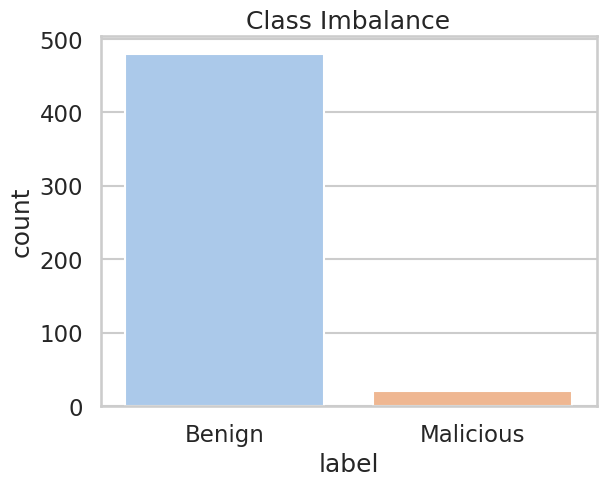

<Figure size 640x480 with 0 Axes>

In [5]:
#visualizing class imbalance
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')
sns.countplot(x='label', data=manual_labelled_df, hue='label')
plt.title('Class Imbalance')
plt.show()

#saving the figure
plt.savefig('class_imbalance.png')

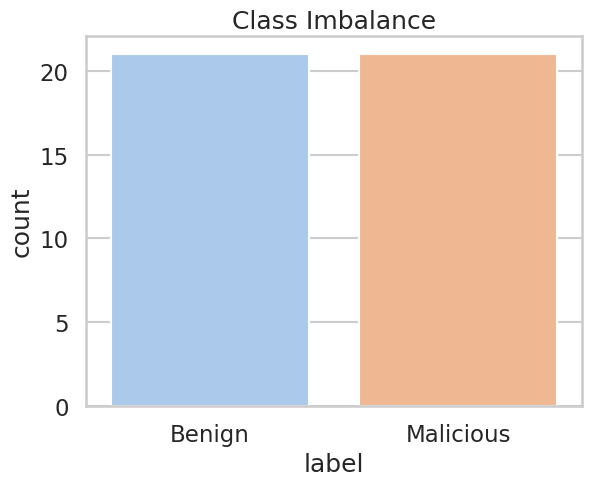

<Figure size 640x480 with 0 Axes>

In [6]:
#balancing the classes
manual_labelled_df = manual_labelled_df.groupby('label').apply(lambda x: x.sample(manual_labelled_df['label'].value_counts().min(), random_state=42)).reset_index(drop=True)

#visualizing the classes
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')
sns.countplot(x='label', data=manual_labelled_df, hue='label')
plt.title('Class Imbalance')
plt.show()

#saving the figure
plt.savefig('class_imbalance_balanced.png')

In [15]:

# Filter 'features' to match the indices of 'manual_labelled_df'
features_sampled = features.loc[manual_labelled_df.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_sampled, manual_labelled_df['label'], test_size=0.2, random_state=42
)

# Train a classifier
BM_predictor = RandomForestClassifier(random_state=42)
BM_predictor.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

      Benign       0.67      1.00      0.80         4
   Malicious       1.00      0.60      0.75         5

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9



# **Model Evaluation**

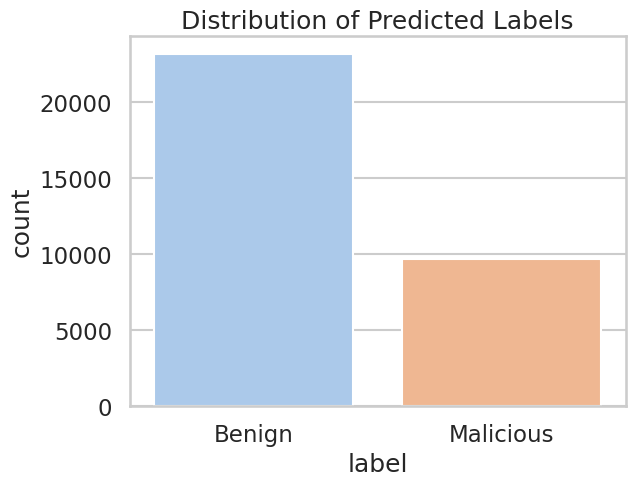

<Figure size 640x480 with 0 Axes>

In [17]:
# Using the model to predict the rest of the dataset
features_df = df[['is_negative', 'is_neutral', 'is_positive', 'retweet_count', 'user_followers_count']]
df['label'] = BM_predictor.predict(features_df)

# Checking the distribution of the predicted labels
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')
sns.countplot(x='label', data=df, hue='label')
plt.title('Distribution of Predicted Labels')
plt.show()

#Saving the figure
plt.savefig('predicted_labels_distribution.png')

 - **Finding the Confidence Interval**

In [24]:
df['prediction_probabilities'] = BM_predictor.predict_proba(features_df).max(axis=1)
print(df[['tweet_text', 'label', 'prediction_probabilities']].sort_values(by='prediction_probabilities', ascending=False).head(10))

                                              tweet_text   label  \
20139  RT @sarahdrew: I love your theories! #CruelSummer  Benign   
27523  RT @annamaetiddies_: âThat was very sweet, b...  Benign   
14438  RT @ChallengerJoe: Have a Great #SaturdayMorni...  Benign   
9048   RT @dude_brick: Thank you neighbourhood car al...  Benign   
26751  RT @ArakunrinP: The real heroes of democracy w...  Benign   
14425  RT @gary_bros: Good morning my friends I've sa...  Benign   
4337   RT @jake_sisko: #CancelDougFord Please do this...  Benign   
14410  RT @BadgerCrafty: Crafty Badger had been desig...  Benign   
14377  RT @BadgerCrafty: Crafty Badger had been desig...  Benign   
25399  RT @BiryaniPepsi: Lady Superstar, Telugu Actre...  Benign   

       prediction_probabilities  
20139                       1.0  
27523                       1.0  
14438                       1.0  
9048                        1.0  
26751                       1.0  
14425                       1.0  
4337         

In [23]:
# Manually Spot Checking  a Sample of the Predictions
print(df[['tweet_text', 'label']].sample(10))

                                              tweet_text      label
5163   Rest In Peace !!\n#KathiMahesh https://t.co/j7...  Malicious
31590  RT @MinisterKTR: Remembering Telangana's Pride...     Benign
20685  RT @wtf1official: Hamilton goes fastest. Got t...  Malicious
23830  RT @ALeagueWrapUp: âï¸ Bucking the A-League...     Benign
5639   RT @MannyR___: Me when Yelena whistled vs hear...  Malicious
15920  RT @B_puppers: only posting these cause the sc...  Malicious
15699  RT @PR_NHL: Carey Price of the @CanadiensMTL i...     Benign
16254  Analytics don't matter in the NHL playoffs. #G...  Malicious
1734   RT @PalakTiwari_: No doubt this is one of the ...     Benign
21373   Also cuz it's #Caturday. https://t.co/hYYHfwE1h4     Benign
